# 2.1 - Series Temporales

![time_series](images/time_series.jpg)

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import pylab as plt

In [2]:
df=pd.read_csv('data/occupancy.csv')

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2664 non-null   object 
 1   Temperature    2664 non-null   float64
 2   Humidity       2664 non-null   float64
 3   Light          2664 non-null   float64
 4   CO2            2664 non-null   float64
 5   HumidityRatio  2664 non-null   float64
 6   Occupancy      2664 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.8+ KB


In [4]:
df['datetime']=pd.to_datetime(df.date)

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,datetime
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2015-02-02 14:00:00
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1,2015-02-02 15:00:00
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2015-02-02 16:00:00
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2015-02-02 17:00:00
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2015-02-02 18:00:00


In [5]:
df=df.set_index('datetime')

df.drop(columns=['date'], inplace=True)

df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
datetime,,,,,,
2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


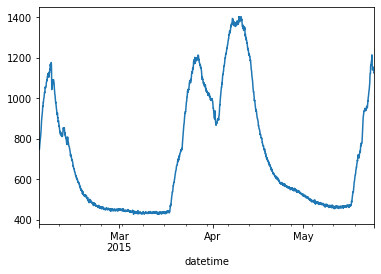

In [6]:
df.CO2.plot();

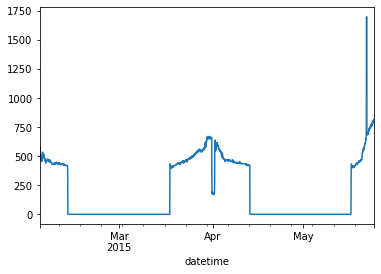

In [7]:
df.Light.plot();

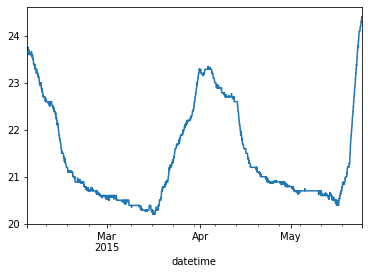

In [8]:
df.Temperature.plot();

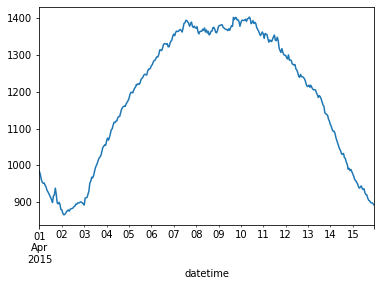

In [9]:
dias=df.CO2.loc['2015-4-1':'2015-4-15']

dias.plot();

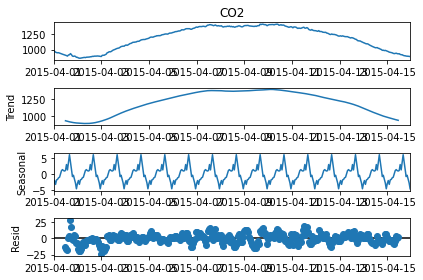

In [10]:
import statsmodels.api as sm

res=sm.tsa.seasonal_decompose(dias)

resplot=res.plot();

### Autoregresión - AR

El modelo usa la relación de dependencia del momento actual con $n$ momentos anteriores. Es, en realidad, una regresión lineal.

$$y_t = \beta_0+\beta_1y_{t-1}+\beta_2y_{t-2}+\ldots+\beta_ny_{t-n}+\epsilon_t$$

Si solamente nos fijamos en el momento anterior, $t-1$, entonces:

$$y_t = \beta_0+\beta_1y_{t-1}+\epsilon_t$$

Es la llamada Cadena de Markov

In [11]:
from pandas.plotting import lag_plot

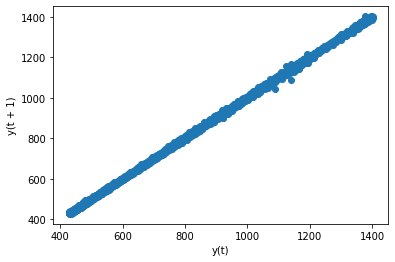

In [12]:
lag_plot(df.CO2);

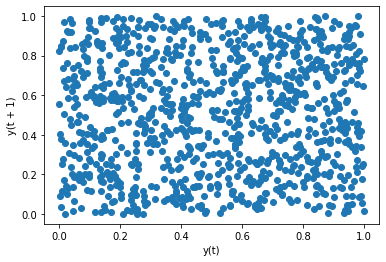

In [13]:
lag_plot(pd.Series(np.random.random(1000)));

In [14]:
# modelo AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [15]:
train, test = df.CO2[:-10], df.CO2[-10:]

In [16]:
modelo=AR(train, 1).fit() # cadena de Markov, lag=1

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [17]:
pred=modelo.predict(len(train), len(df.CO2)-1)

error=(pred-test).abs().sum()/len(pred)  # mae

error

0.0

In [18]:
res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

,real,pred,diff
2015-05-24 04:00:00,1153.250000,NaN,NaN
2015-05-24 05:00:00,1152.400000,NaN,NaN
2015-05-24 06:00:00,1146.166667,NaN,NaN
2015-05-24 07:00:00,1145.400000,NaN,NaN
2015-05-24 08:00:00,1140.800000,NaN,NaN
2015-05-24 09:00:00,1150.250000,NaN,NaN
2015-05-24 10:00:00,1129.200000,NaN,NaN
2015-05-24 11:00:00,1125.800000,NaN,NaN
2015-05-24 12:00:00,1123.000000,NaN,NaN
2015-05-24 13:00:00,1124.000000,NaN,NaN


In [19]:
for i in range(1, 100, 10):
    modelo=AR(train, i).fit()
    pred=modelo.predict(len(train), len(df.CO2)-1)     # la prediccion en el intervalo
    error=(pred-test).abs().sum()/len(pred)            # error medio absoluto
    print ('Error mae: ', error.round(5), '  Maxlag : ', i)

/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/Users/iudh/opt/anaconda3/envs/c

Error mae:  0.0   Maxlag :  1
Error mae:  0.0   Maxlag :  11
Error mae:  0.0   Maxlag :  21
Error mae:  0.0   Maxlag :  31
Error mae:  0.0   Maxlag :  41
Error mae:  0.0   Maxlag :  51
Error mae:  0.0   Maxlag :  61
Error mae:  0.0   Maxlag :  71
Error mae:  0.0   Maxlag :  81
Error mae:  0.0   Maxlag :  91


/Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


### Media Móvil (Moving Average MA)

Una manera matemática de expresar la MA puede ser:

$$y_t = \beta_0+\epsilon_t+\epsilon_{t-1}\phi_{t-1}+\epsilon_{t-2}\phi_{t-2}+\ldots+\epsilon_{t-n}\phi_{t-n}$$


Se usa la relación entre las observaciones y el error residual de la media móvil.

Otra es la evidente, la media móvil, se muestra en el gráfico.

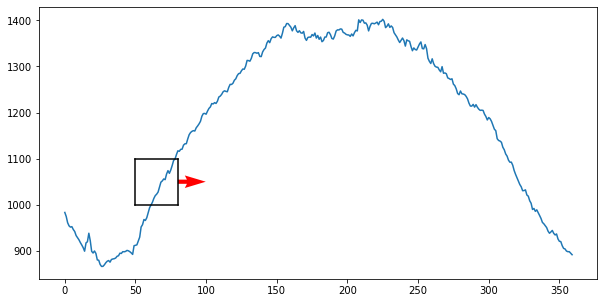

In [20]:
plt.figure(figsize=(10, 5))

plt.plot(dias.values)

plt.plot([50, 80],[1000, 1000], color='black')
plt.plot([50, 50],[1000, 1100], color='black')
plt.plot([50, 80],[1100, 1100], color='black')
plt.plot([80, 80],[1000, 1100], color='black')

plt.quiver(80, 1050, 1, 0, scale=20, color='r');

### ARMA (AutoRegressive Moving Average)

Unión de ambos conceptos.

$$y_t = \beta_0 + \epsilon_t + \sum_{i=1}^{n}\beta_iy_{t-i} + \sum_{i=1}^{m}\phi_i\epsilon_{t-i}$$

In [21]:
# ARMA  order==> p=>AR (n, maxlag), q=>MA (m, ancho de la ventana)

from statsmodels.tsa.arima_model import ARMA

In [22]:
#help(ARIMA)

In [29]:
%%time

modelo=ARMA(train, order=(9, 3)).fit(disp=False)

2022-03-01 09:46:29,551 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 09:46:37,650 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



CPU times: user 14.2 s, sys: 35.6 s, total: 49.8 s
Wall time: 8.1 s


In [30]:
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)

res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

Error mae:  14.721007044945827


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1152.419882,-0.830118
2015-05-24 05:00:00,1152.400000,1152.776372,0.376372
2015-05-24 06:00:00,1146.166667,1152.720988,6.554321
2015-05-24 07:00:00,1145.400000,1153.012002,7.612002
2015-05-24 08:00:00,1140.800000,1153.355282,12.555282
2015-05-24 09:00:00,1150.250000,1153.699252,3.449252
2015-05-24 10:00:00,1129.200000,1154.080929,24.880929
2015-05-24 11:00:00,1125.800000,1154.352560,28.552560
2015-05-24 12:00:00,1123.000000,1154.601382,31.601382
2015-05-24 13:00:00,1124.000000,1154.797854,30.797854


### ARIMA (AutoRegressive Integrated Moving Average)

Lo de Integrated trata de hacer la serie temporal estacionaria, similar al concepto de PID.

In [33]:
%%time

# ARIMA  order==> (p, d, q)  d=>Integrated
from statsmodels.tsa.arima_model import ARIMA

modelo=ARIMA(train, order=(4, 2, 2)).fit(disp=False)

                     
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

2022-03-01 09:52:54,547 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 09:52:54,550 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'



Error mae:  1139.215293370495
CPU times: user 1.72 s, sys: 2.69 s, total: 4.41 s
Wall time: 1.28 s


,real,pred,diff
2015-05-24 04:00:00,1153.250000,-2.076543,-1155.326543
2015-05-24 05:00:00,1152.400000,-0.000914,-1152.400914
2015-05-24 06:00:00,1146.166667,0.231856,-1145.934811
2015-05-24 07:00:00,1145.400000,0.045622,-1145.354378
2015-05-24 08:00:00,1140.800000,-0.068862,-1140.868862
2015-05-24 09:00:00,1150.250000,-0.021041,-1150.271041
2015-05-24 10:00:00,1129.200000,0.007443,-1129.192557
2015-05-24 11:00:00,1125.800000,0.003471,-1125.796529
2015-05-24 12:00:00,1123.000000,-0.003685,-1123.003685
2015-05-24 13:00:00,1124.000000,-0.003613,-1124.003613


### ADF-test (testeo de la estacionaridad)

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

### SARIMA (Seasonal AutoRegressive Integrated Moving Average)
Arima por estaciones.

### SARIMAX (Seasonal AutoRegressive Integrated Moving Average Exogenous)
SARIMA con regresores exógenos.

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
%%time

modelo=SARIMAX(endog=train, 
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(4, 1, 5, 2) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(train), len(df.CO2)-1)     
error=(pred-test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':test, 'pred':pred, 'diff':pred-test})
res

2022-03-01 10:03:18,506 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 10:03:18,511 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'

2022-03-01 10:03:23,268 [35814] WARNING  py.warnings:109: [JupyterRequire] /Users/iudh/opt/anaconda3/envs/clase/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "



Error mae:  23.634354367712966
CPU times: user 8.11 s, sys: 20.7 s, total: 28.8 s
Wall time: 5.04 s


,real,pred,diff
2015-05-24 04:00:00,1153.250000,1155.949143,2.699143
2015-05-24 05:00:00,1152.400000,1155.660175,3.260175
2015-05-24 06:00:00,1146.166667,1159.908692,13.742025
2015-05-24 07:00:00,1145.400000,1159.585052,14.185052
2015-05-24 08:00:00,1140.800000,1163.102261,22.302261
2015-05-24 09:00:00,1150.250000,1162.467917,12.217917
2015-05-24 10:00:00,1129.200000,1165.692923,36.492923
2015-05-24 11:00:00,1125.800000,1165.463698,39.663698
2015-05-24 12:00:00,1123.000000,1169.612019,46.612019
2015-05-24 13:00:00,1124.000000,1169.168332,45.168332


In [45]:
#help(SARIMAX)

## FB-Prophet

https://facebook.github.io/prophet/docs/quick_start.html

https://github.com/facebookresearch/Kats

In [24]:
#!pip install fbprophet
#!conda install -c conda-forge fbprophet

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from fbprophet import Prophet

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')

In [47]:
# datos, consumo de energia

pjme=pd.read_csv('data/PJME_hourly.csv', index_col=[0], parse_dates=[0])
pjme.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


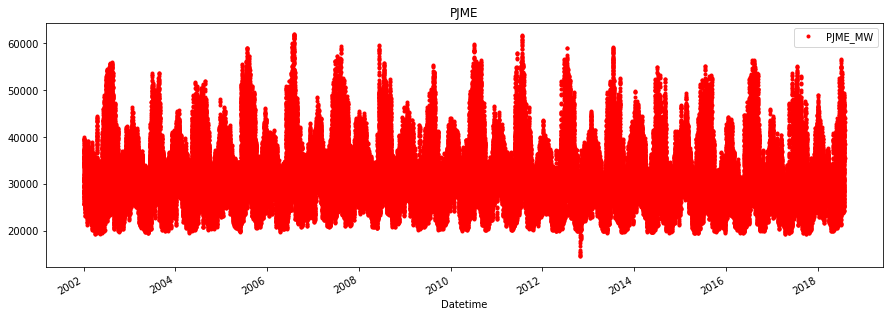

In [48]:
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')

In [51]:
# se definen las caracteristicas temporales

def features(df, label):
    df=df.copy()
    df['date']=df.index
    df['hour']=df.date.dt.hour
    df['day_of_week']=df.date.dt.dayofweek
    df['quarter']=df.date.dt.quarter
    df['month']=df.date.dt.month
    df['year']=df.date.dt.year
    df['day_of_year']=df.date.dt.dayofyear
    df['day_of_month']=df.date.dt.day
    df['week_of_year']=df.date.dt.weekofyear
    
    X=df[['hour', 'day_of_week', 'quarter', 'month', 'year',
          'day_of_year', 'day_of_month', 'week_of_year']]
    y=df[label]
    
    return X,y

In [56]:
X, y = features(pjme, 'PJME_MW')

data=pd.concat([X, y], axis=1)

data.head()

,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


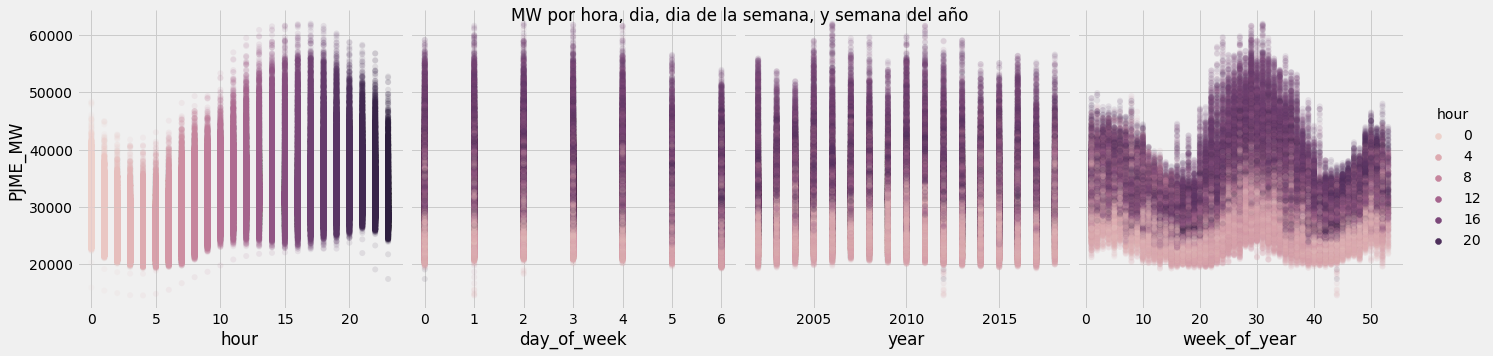

In [57]:
sns.pairplot(data.dropna(), 
             hue='hour', 
             x_vars=['hour', 'day_of_week', 'year', 'week_of_year'],
             y_vars='PJME_MW', 
             height=5, 
             plot_kws={'alpha':0.1, 'linewidth':0})


plt.suptitle('MW por hora, dia, dia de la semana, y semana del año')
plt.show();

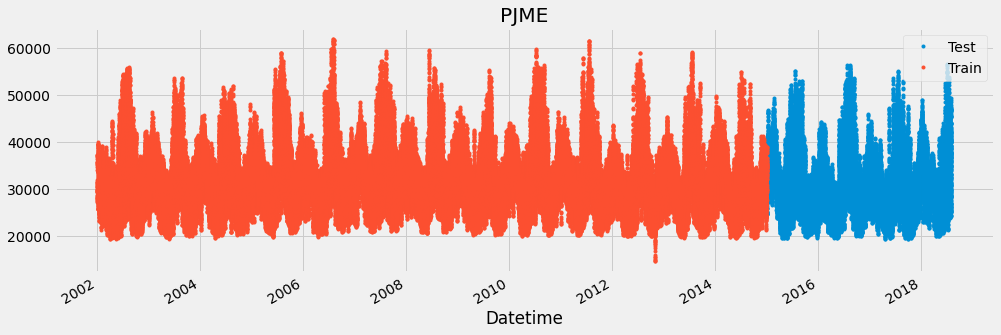

In [58]:
split_date='01-Jan-2015'

train=pjme.loc[pjme.index<=split_date].copy()
test=pjme.loc[pjme.index>split_date].copy()

_=test.rename(columns={'PJME_MW': 'Test'})\
      .join(train.rename(columns={'PJME_MW': 'Train'}), how='outer')\
      .plot(figsize=(15,5), title='PJME', style='.')

In [59]:
# modelo

train=train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})
test=test.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'})

train.head()

# las columnas se tienen que llamar ds e y respectivamente, o peta

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [60]:
%%time
modelo=Prophet().fit(train)

pred=modelo.predict(test)

CPU times: user 2min 14s, sys: 24.7 s, total: 2min 39s
Wall time: 2min 13s


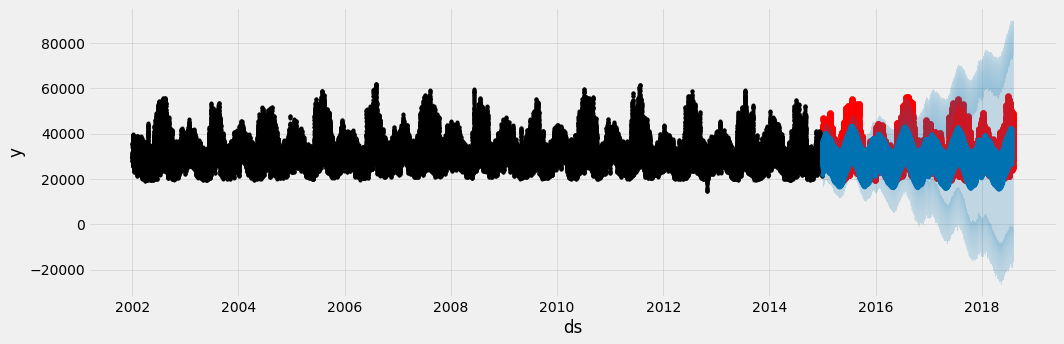

In [61]:
# comparando

f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

In [62]:
# metricas de error

mean_squared_error(test.y, pred.yhat)**0.5

6613.5548338678145

In [63]:
mean_absolute_error(test.y, pred.yhat)

5180.994257525665

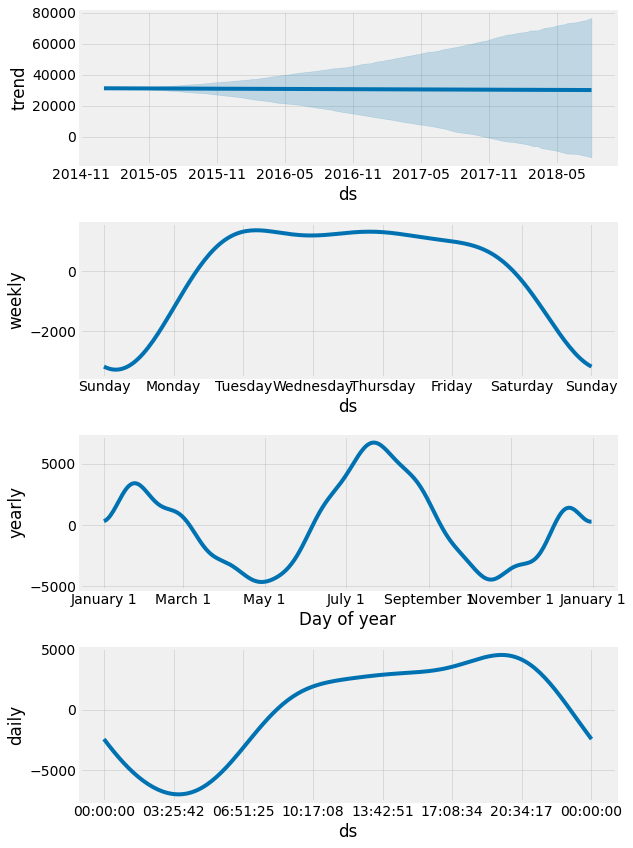

In [64]:
fig = modelo.plot_components(pred)

In [65]:
# Con vacaciones

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
train_h = cal.holidays(train.index.min(), train.index.max())
test_h = cal.holidays(test.index.min(), test.index.max())

In [70]:
#help(pd.tseries.holiday)

In [71]:
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])

df_h = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})

df_h['holiday'] = 'USFederalHoliday'
df_h = df_h.drop(['PJME_MW','date','is_holiday'], axis=1)

df_h.head()

,ds,holiday
0,2003-01-01 00:00:00,USFederalHoliday
1,2002-12-25 01:00:00,USFederalHoliday
2,2002-12-25 02:00:00,USFederalHoliday
3,2002-12-25 03:00:00,USFederalHoliday
4,2002-12-25 04:00:00,USFederalHoliday


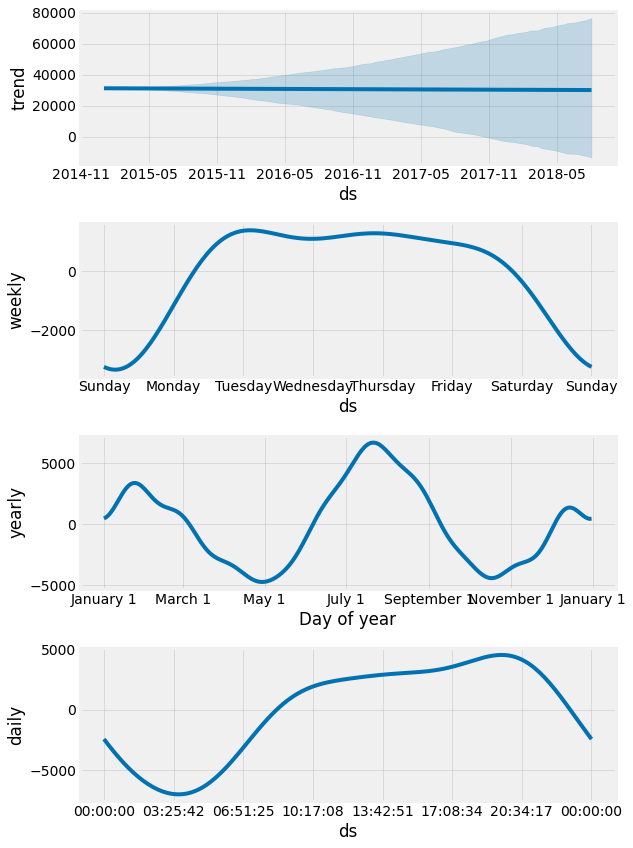

In [72]:
modelo_h = Prophet(holidays=df_h).fit(train)

fig2=modelo_h.plot_components(pred)

In [73]:
pred_h=modelo.predict(test)
pred_h.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31221.391589,23880.877299,32852.159182,31221.391589,31221.391589,-2853.868954,-2853.868954,-2853.868954,-4430.346894,...,1281.388693,1281.388693,1281.388693,295.089246,295.089246,295.089246,0.0,0.0,0.0,28367.522634
1,2015-01-01 02:00:00,31221.355512,22640.379349,31115.922627,31221.355512,31221.355512,-4358.239649,-4358.239649,-4358.239649,-5927.253184,...,1272.631637,1272.631637,1272.631637,296.381898,296.381898,296.381898,0.0,0.0,0.0,26863.115863
2,2015-01-01 03:00:00,31221.319436,21662.687197,30778.022826,31221.319436,31221.319436,-5229.944901,-5229.944901,-5229.944901,-6790.329743,...,1262.668776,1262.668776,1262.668776,297.716066,297.716066,297.716066,0.0,0.0,0.0,25991.374535
3,2015-01-01 04:00:00,31221.283360,21170.992700,30387.385054,31221.283360,31221.283360,-5371.515616,-5371.515616,-5371.515616,-6922.231092,...,1251.623699,1251.623699,1251.623699,299.091777,299.091777,299.091777,0.0,0.0,0.0,25849.767744
4,2015-01-01 05:00:00,31221.247283,21752.020655,30942.756487,31221.247283,31221.247283,-4697.197285,-4697.197285,-4697.197285,-6237.338546,...,1239.632205,1239.632205,1239.632205,300.509056,300.509056,300.509056,0.0,0.0,0.0,26524.049998


In [74]:
mean_squared_error(test.y, pred_h.yhat)**0.5

6613.5548338678145

In [81]:
mean_absolute_error(test.y, pred_h.yhat)

5180.994257525665

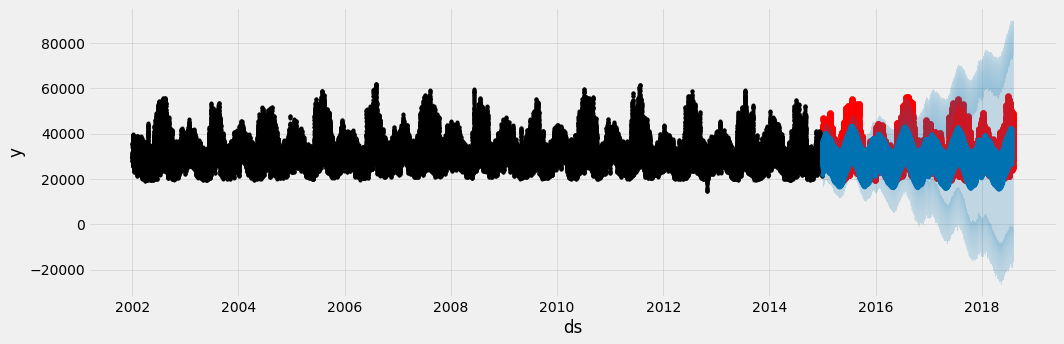

In [76]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test.y, color='r')
fig=modelo.plot(pred, ax)

### Yahoo Finance

In [ ]:
#!pip install yfinance

In [82]:
import pandas as pd
import yfinance as yf

import time

In [83]:
data=yf.download(tickers='UBER', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

[*********************100%***********************]  1 of 1 completed


{'Open': 36.029998779296875,
 'High': 36.029998779296875,
 'Low': 36.029998779296875,
 'Close': 36.029998779296875,
 'Adj Close': 36.029998779296875,
 'Volume': 0,
 'datetime': Timestamp('2022-02-28 16:00:00-0500', tz='America/New_York')}

In [85]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,datetime
Datetime,,,,,,,
2022-02-22 09:30:00-05:00,34.209999,34.630001,34.200001,34.630001,34.630001,715965,2022-02-22 09:30:00-05:00
2022-02-22 09:31:00-05:00,34.619999,34.700001,34.450001,34.450001,34.450001,178511,2022-02-22 09:31:00-05:00
2022-02-22 09:32:00-05:00,34.430000,34.539902,34.410000,34.450001,34.450001,61997,2022-02-22 09:32:00-05:00
2022-02-22 09:33:00-05:00,34.450001,34.599998,34.380001,34.380001,34.380001,95156,2022-02-22 09:33:00-05:00
2022-02-22 09:34:00-05:00,34.389999,34.509998,34.369999,34.470001,34.470001,118955,2022-02-22 09:34:00-05:00


In [88]:
data=yf.download(tickers='^DJI', period='5d', interval='1m')

data['datetime']=data.index

data.to_dict(orient='records')[-1]

[*********************100%***********************]  1 of 1 completed


{'Open': 165.1199951171875,
 'High': 165.1199951171875,
 'Low': 165.1199951171875,
 'Close': 165.1199951171875,
 'Adj Close': 165.1199951171875,
 'Volume': 0,
 'datetime': Timestamp('2022-02-28 16:00:00-0500', tz='America/New_York')}

In [92]:
data=yf.download(tickers='^IBEX', period='5d', interval='1m')

data['datetime']=data.index

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,datetime
Datetime,,,,,,,
2022-03-01 10:49:00+01:00,8363.000000,8369.900391,8363.000000,8369.700195,8369.700195,459126,2022-03-01 10:49:00+01:00
2022-03-01 10:50:00+01:00,8370.099609,8370.299805,8364.700195,8364.700195,8364.700195,628522,2022-03-01 10:50:00+01:00
2022-03-01 10:51:00+01:00,8363.299805,8363.299805,8358.599609,8358.599609,8358.599609,400118,2022-03-01 10:51:00+01:00
2022-03-01 10:52:00+01:00,8357.799805,8358.599609,8356.200195,8358.299805,8358.299805,639883,2022-03-01 10:52:00+01:00
2022-03-01 10:53:25+01:00,8358.400391,8358.400391,8358.400391,8358.400391,8358.400391,0,2022-03-01 10:53:25+01:00


In [96]:
while 1:
    data=yf.download(tickers='^IBEX', period='5d', interval='1m')

    data['datetime']=data.index

    print(data.tail(1))
    
    time.sleep(0.5)

[*********************100%***********************]  1 of 1 completed
                                  Open         High          Low        Close  \
Datetime                                                                        
2022-03-01 10:55:40+01:00  8366.200195  8366.200195  8366.200195  8366.200195   

                             Adj Close  Volume                  datetime  
Datetime                                                                  
2022-03-01 10:55:40+01:00  8366.200195       0 2022-03-01 10:55:40+01:00  
[*********************100%***********************]  1 of 1 completed
                                  Open         High          Low        Close  \
Datetime                                                                        
2022-03-01 10:55:50+01:00  8363.799805  8363.799805  8363.799805  8363.799805   

                             Adj Close  Volume                  datetime  
Datetime                                                                  

KeyboardInterrupt: 